#Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/KU"
%cd /content/drive/MyDrive/KU

BDDC  fasterrcnn.ipynb	mmdetection  yolov5
/content/drive/MyDrive/KU


## Setup MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html


# !git clone https://github.com/open-mmlab/mmdetection.git 
%cd /content/drive/MyDrive/KU/mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:15:48tcmalloc: large alloc 1147494400 bytes == 0x56312da4c000 @  0x7fdf370ce615 0x5630f389117c 0x5630f397147a 0x5630f3893f9d 0x5630f3985d4d 0x5630f3907ec8 0x5630f3902a2e 0x5630f389588a 0x5630f3907d30 0x5630f3902a2e 0x5630f389588a 0x5630f3904719 0x5630f3986b76 0x5630f3903d95 0x5630f3986b76 0x5630f3903d95 0x5630f3986b76 0x5630f3903d95 0x5630f3895ce9 0x5630f38d9579 0x5630f3894902 0x5630f3907c4d 0x5630f3902a2e 0x5630f389588a 0x5630f3904719 0x5630f3902a2e 0x5630f389588a 0x5630f39038f6 0x5630f38957aa 0x5630f3903b4f 0x5630f3902a2e
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:15tcmalloc: large alloc 1434370048 bytes == 0x5631720a2000 @  0x7fdf370ce615 0x5630f389117c 0x5630f397147a 0x5630f3893f9d 0x5630f3985d4d 0x5630f3907ec8 0x5630f3902a2e 0x5630f389588a 0x5630f3907d30 0x5630f3902a2e 0x5630f389588a 0x5630f3904719 0x5630f3986b76 0x5630f3903d

In [ ]:
from mmcv import collect_env
collect_env()

{'CUDA available': True,
 'CUDA_HOME': '/usr/local/cuda',
 'GCC': 'gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'GPU 0': 'Tesla T4',
 'MMCV': '1.4.8',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'NVCC': 'Build cuda_11.1.TC455_06.29190527_0',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86\n  - CuDNN 

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection

/content/drive/MyDrive/KU/mmdetection


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.22.0
11.1
GCC 7.3


## Train A Detector on A Customized Dataset





In [ ]:
dataset_path = "/content/drive/MyDrive/KU/datasets/train/"

In [ ]:
# Install tree first
!apt-get -q install tree
!tree datasetsx/train

In [ ]:
# !rm -rf /content/drive/MyDrive/KU/yanlıs/work_dirs

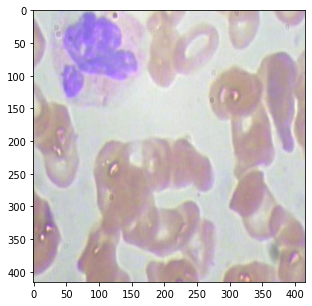

(416, 416, 3)


In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/MyDrive/KU/mmdetection/data/coco/train/BloodImage_00001_jpg.rf.a1b412d0ef5b688d857f7ed28799bf85.jpg')
plt.figure(figsize=(10, 5))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

print(img.shape)

1. mmdet > datasets > coco.py change the classes or palette also .

2. conifg > base > datasets > cocodetection copy that to your config file...your config file should be in config folder!

3. indicate your direction etc. 

4. then find the config model that you want to use. copy it to your config file also... 

5. go to schedule and take it...then paste it to config file... it has optimizer etc. 

6. mmdet>datasets> look at init py file for checking your dataset type imported or not. e.g. cocodataset. 

7. change the classes in your config file or your epochs etc. 

8. 



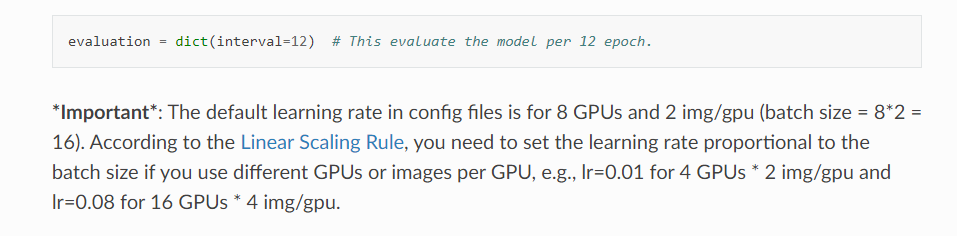

In [ ]:
!python tools/train.py /content/drive/MyDrive/KU/mmdetection/configs/_base_/default_runtime.py

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-29 05:35:07,821 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1

In [ ]:
!python tools/test.py \
    /content/drive/MyDrive/KU/mmdetection/configs/_base_/default_runtime.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/epoch_12.pth \
    --show-dir cascade_results

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.84s)
creating index...
index created!
load checkpoint from local path: /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/epoch_12.pth
[                                                  ] 0/36, elapsed: 0s, ETA:/usr/local/lib/py

### ensemble trying..

In [ ]:
!pip install ensemble-boxes

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection/

/content/drive/MyDrive/KU/mmdetection


In [ ]:
!bash /content/drive/MyDrive/KU/mmdetection/tools/dist_test.sh \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/default_runtime.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/default_runtime/epoch_12.pth \
    1 \
    --format-only \
    --options "jsonfile_prefix=./cascad"

!bash /content/drive/MyDrive/KU/mmdetection/tools/dist_test.sh \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/deformable_config.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/epoch_12.pth \
    1 \
    --format-only \
    --options "jsonfile_prefix=./deform"

!bash /content/drive/MyDrive/KU/mmdetection/tools/dist_test.sh \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/pisa_model_config.py\
    /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/latest.pth \
    1 \
    --format-only \
    --options "jsonfile_prefix=./pis"

/usr/local/lib/python3.7/dist-packages/torch/distributed/launch.py:164: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  "The module torch.distributed.launch is deprecated "
The module torch.distributed.launch is deprecated and going to be removed in future.Migrate to torch.distributed.run
 Please read local_rank from `os.environ('LOCAL_RANK')` instead.
INFO:torch.distributed.launcher.api:Starting elastic_operator with launch configs:
  entrypoint       : /content/drive/MyDrive/KU/mmdetection/tools/test.py
  min_nodes        : 1
  max_nodes        : 1
  nproc_per_node   : 1
  run_id           : none
  rdzv_backend     : static
  rdzv_endpoint    : 127.0.0.1:29500
  rdzv_configs     : {'rank': 0, 'timeout': 900}
  max_restarts     : 3
  monitor_interval : 5
  log_dir          : None
  metrics_cfg      : {}

INFO:torch.distributed.elastic.agent.server.local_elastic_agent:log directory set to: /tmp/torchelastic_dd1dt48u/none_vajb0xg0
INFO:torch.distributed.elas

In [ ]:
!python /content/drive/MyDrive/KU/mmdetection/mmdet/utils/submission.py

In [ ]:
# !python /content/drive/MyDrive/KU/mmdetection/mmdet/utils/ensemble.py --csv [/content/drive/MyDrive/KU/mmdetection/submission.csv, /content/drive/MyDrive/KU/mmdetection/submissiondef.csv]

Traceback (most recent call last):
  File "/content/drive/MyDrive/KU/mmdetection/mmdet/utils/ensemble.py", line 213, in <module>
    weights.append(float(weight))
ValueError: could not convert string to float: '/content/drive/MyDrive/KU/mmdetection/submissiondef.csv]'


In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection

/content/drive/MyDrive/KU/mmdetection


In [ ]:
# !rm -rf /content/drive/MyDrive/KU/mmdetection/ensemble_models/output

In [ ]:
!python ./final_ensemble.py

['submissiondef.csv', 'submission.csv', 'submissionpisa.csv', '.ipynb_checkpoints']
./ensemble_models/submissiondef.csv
./ensemble_models/submission.csv
./ensemble_models/submissionpisa.csv
selected 3 models.
----------------------------------------
weight : [1 1 1]
  0% 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_nmw.py:64: UserWarning: X2 < X1 value in box. Swap them.
  warnings.warn('X2 < X1 value in box. Swap them.')
/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_nmw.py:67: UserWarning: Y2 < Y1 value in box. Swap them.
  warnings.warn('Y2 < Y1 value in box. Swap them.')
/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_wbf.py:58: UserWarning: X2 < X1 value in box. Swap them.
  warnings.warn('X2 < X1 value in box. Swap them.')
/usr/local/lib/python3.7/dist-packages/ensemble_boxes/ensemble_boxes_wbf.py:61: UserWarning: Y2 < Y1 value in box. Swap them.
  warnings.warn('Y2 < Y1 value in box. Swap the

In [ ]:
!python /content/drive/MyDrive/KU/mmdetection/ensemble_models/resubmit.py

0 276.6666564941406 0.44698795676231384 0.08777349442243576 38.23493957519531 44.84819412231445 0 192.6666717529297 21.614187240600586 0.14982958137989044 167.2197265625 114.47232055664062 0 179.25 58.606693267822266 0.6615030765533447 340.25384521484375 71.85216522216797 167 129.66666666666666 0.0535 2.0 69.0 25.0 158 125.0 0.0528 32.0 10.0 65.0 0 107.0 34.0 0.7626 103.0 80.0 106 74.33333333333333 0.0826 41.0 41.0 107.0 151 61.666666666666664 0.9867 42.0 74.0 123.0 152 61.666666666666664 0.9222 108.0 69.0 124.0 124 58.666666666666664 0.0733 121.0 241.0 219.0 4 51.0 46.0 0.0523 234.0 273.0 0 48.666666666666664 50.0 0.0626 364.0 24.0 188 47.333333333333336 0.0945 83.0 180.0 280.0 297 45.0 0.9527 113.0 73.0 311.0 4 44.0 0.0577 24.0 39.0 59.0 296 43.666666666666664 0.8412 52.0 76.0 119.0 0 41.666666666666664 0.6608 51.0 48.0 98.0 86 39.666666666666664 0.0565 29.0 229.0 144.0 77 37.666666666666664 0.8842 32.0 316.0 72.0 84 34.333333333333336 0.9709 71.0 247.0 344.0 216 31.0 71.0 0.66 97.0 

In [ ]:
import pandas as pd
import os 
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection

/content/drive/MyDrive/KU/mmdetection


In [ ]:
# csv_path = ['/opt/ml/detection/utils/ensemble_models/output/nms.csv', 
#             '/opt/ml/detection/utils/ensemble_models/output/soft_nms.csv',
#             '/opt/ml/detection/utils/ensemble_models/output/non_maximum_weighted.csv', 
# csv_path=[  "/content/drive/MyDrive/KU/mmdetection/ensemble_models/output/weighted_boxes_fusion.csv"]


# filenames = []
# dfs = []
# for path in csv_path:
#     dfs.append(pd.read_csv(path))
#     filenames.append(os.path.basename(path))

# rand_index = np.random.randint(0,len(dfs[0]),10)
# # index = [ 541, 4087, 4717, 3614, 3891, 4090, 1466, 2409, 2866, 3258]
# index = [1,2,3]

# print(f"selected filenames : {filenames}")
# print(f"selected index : {index}")

# view_size = 8
# fig, axes = plt.subplots(len(index), len(csv_path), sharex=True, sharey=True, figsize=(view_size*len(csv_path), view_size*len(index)+2))
# for row, idx in enumerate(index):
#     for col, df in enumerate(dfs):
#         condition = df['image_id'] == f'test/{idx:0>4d}.jpg'

#         if condition.any():
#             image_info = df[condition].values
#             if len(image_info) > 1:
#                 print("submission has too many row in same id")

#             PredictionString, image_id = image_info[0]

#             show_bbox_image(image_id, PredictionString, thr=0, ax=axes[row,col], text_label=False, image_label=True)

# plt.show()

##deformable

In [ ]:
!python tools/train.py /content/drive/MyDrive/KU/mmdetection/configs/_base_/deformable_config.py

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-31 15:25:45,057 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1

In [ ]:
!python tools/test.py \
    /content/drive/MyDrive/KU/mmdetection/configs/_base_/deformable_config.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/epoch_12.pth \
    --show-dir dcn_results

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.29s)
creating index...
index created!
load checkpoint from local path: /content/drive/MyDrive/KU/mmdetection/work_dirs/deformable_config/epoch_12.pth
2022-03-31 16:09:48,592 - root - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is 

##Pisa

In [ ]:
!python tools/train.py /content/drive/MyDrive/KU/mmdetection/configs/_base_/pisa_model_config.py

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-31 17:00:28,909 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1

In [ ]:
!python tools/test.py \
    /content/drive/MyDrive/KU/mmdetection/configs/_base_/pisa_model_config.py \
    /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/epoch_12.pth \
    --show-dir pisa_results

/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/KU/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: /content/drive/MyDrive/KU/mmdetection/work_dirs/pisa_model_config/epoch_12.pth
[                                                  ] 0/36, elapsed: 0s, ETA:/usr/local/lib/

In [ ]:
%cd /content/drive/MyDrive/KU/mmdetection/

/content/drive/MyDrive/KU/mmdetection


### Understand the log
From the log, we can have a basic understanding on the training process and know how well the detector is trained.

First, since the dataset we are using is small, we loaded a pre-trained Faster R-CNN model and fine-tune it for detection. 
The original Faster R-CNN is trained on COCO dataset that contains 80 classes but KITTI Tiny dataset only have 3 classes. Therefore, the last FC layers of the pre-trained Faster R-CNN for classification and regression have different weight shape and are not used.

Second, after training, the detector is evaluated by the default VOC-style evaluation. The results show that the detector achieves 58.1 mAP on the val dataset, not bad!

We can also check the tensorboard to see the curves.

In [ ]:
# # load tensorboard in colab
# %load_ext tensorboard

# # see curves in tensorboard
# %tensorboard --logdir ./tutorial_exps

From the tensorboard, we can observe that changes of loss and learning rate. We can see the losses of each branch gradually decrease as the training goes by.

## Test the Trained Detector

After finetuning the detector, let's visualize the prediction results!

## Perform Inference with An MMDet detector



### Format

In [ ]:
#@title
# Check the label of a single image
# !cat kitti_tiny/training/label_2/000000.txt

Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01


According to the KITTI's documentation, the first column indicates the class of the object, and the 5th to 8th columns indicate the bboxes. We need to read annotations of each image and convert them into middle format that MMDetection can accept, as follows:

```python
[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4) in (x1, y1, x2, y2) order,
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

In [ ]:
# #@title
# import copy
# import os.path as osp

# import mmcv
# import numpy as np

# from mmdet.datasets.builder import DATASETS
# from mmdet.datasets.custom import CustomDataset

# @DATASETS.register_module()
# class KittiTinyDataset(CustomDataset):

#     CLASSES = ('Car', 'Pedestrian', 'Cyclist')

#     def load_annotations(self, ann_file):
#         cat2label = {k: i for i, k in enumerate(self.CLASSES)}
#         # load image list from file
#         image_list = mmcv.list_from_file(self.ann_file)
    
#         data_infos = []
#         # convert annotations to middle format
#         for image_id in image_list:
#             filename = f'{self.img_prefix}/{image_id}.jpeg'
#             image = mmcv.imread(filename)
#             height, width = image.shape[:2]
    
#             data_info = dict(filename=f'{image_id}.jpeg', width=width, height=height)
    
#             # load annotations
#             label_prefix = self.img_prefix.replace('image_2', 'label_2')
#             lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
#             content = [line.strip().split(' ') for line in lines]
#             bbox_names = [x[0] for x in content]
#             bboxes = [[float(info) for info in x[4:8]] for x in content]
    
#             gt_bboxes = []
#             gt_labels = []
#             gt_bboxes_ignore = []
#             gt_labels_ignore = []
    
#             # filter 'DontCare'
#             for bbox_name, bbox in zip(bbox_names, bboxes):
#                 if bbox_name in cat2label:
#                     gt_labels.append(cat2label[bbox_name])
#                     gt_bboxes.append(bbox)
#                 else:
#                     gt_labels_ignore.append(-1)
#                     gt_bboxes_ignore.append(bbox)

#             data_anno = dict(
#                 bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
#                 labels=np.array(gt_labels, dtype=np.long),
#                 bboxes_ignore=np.array(gt_bboxes_ignore,
#                                        dtype=np.float32).reshape(-1, 4),
#                 labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

#             data_info.update(ann=data_anno)
#             data_infos.append(data_info)

#         return data_infos

/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


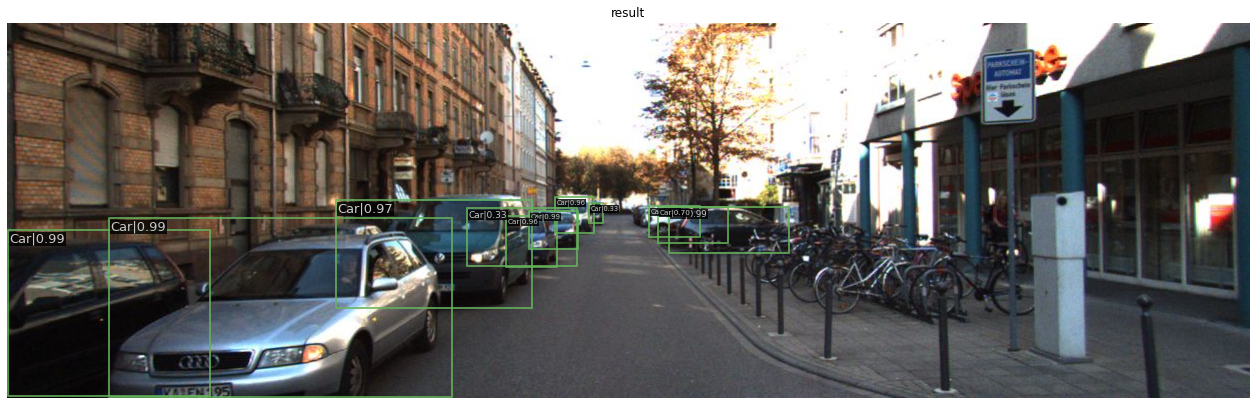

In [ ]:
img = mmcv.imread('kitti_tiny/training/image_2/000068.jpeg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)


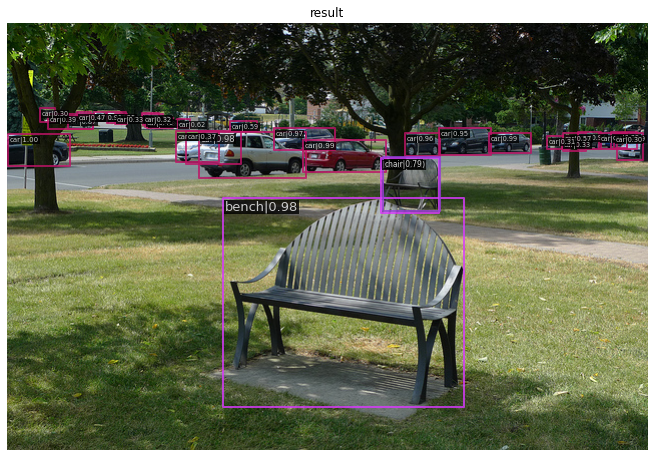

In [ ]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

In [ ]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


### A two-stage detector

In this tutorial, we use Faster R-CNN, a simple two-stage detector as an example.

The high-level architecture of Faster R-CNN is shown in the following picture. More details can be found in the [paper](https://arxiv.org/abs/1506.01497).

![faster rcnn](https://pic1.zhimg.com/80/v2-c0172be282021a1029f7b72b51079ffe_1440w.jpg)

![mmdet](https://pic2.zhimg.com/v2-e49ebcf931b5cf424ed311338f9ff35d_b.jpg)

Briefly, it uses a convolutional neural network (CNN) as backbone to extract features from an image. Then, it uses a region proposal network (RPN) to predict proposals, i.e., potential objects. After that, it uses a feature extractor to crop features for the region of interests (RoI), and uses a RoI Head to perform classification and bounding box prediction.



In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth

--2022-03-28 05:38:04--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.18
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167291982 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’

checkpoints/faster_ 100%[===================>] 159.54M  8.29MB/s    in 18s     

2022-03-28 05:38:23 (9.06 MB/s) - ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’ saved [167291982/167291982]



In [ ]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

From the printed model, we will find that the model does consist of the components that we described earlier. It uses ResNet as its CNN backbone, and has a RPN head and RoI Head. In addition, the model has a neural network module, named neck, directly after the CNN backbone. It is a [feature pyramid network (FPN)](https://arxiv.org/abs/1612.03144) for enhancing the multi-scale features.


### Inference the detector

Since the model is successfully created and loaded, let's see how good it is. We use the high-level API `inference_detector` implemented in the MMDetection. This API is created to ease the inference process. The details of the codes can be found [here](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/inference.py#L15).

### Support a new dataset

There are three ways to support a new dataset in MMDetection: 
  1. Reorganize the dataset into a COCO format.
  2. Reorganize the dataset into a middle format.
  3. Implement a new dataset.

We recommend the first two methods, as they are usually easier than the third one.

In this tutorial, we give an example that converts the data into the formats of existing datasets, e.g. COCO, VOC, etc. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/tutorials/customize_dataset.html#).

First, let's download a tiny dataset obtained from [KITTI](http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d). We select the first 75 images and their annotations from the 3D object detection dataset (it is the same dataset as the 2D object detection dataset but with 3D annotations). We convert the original images from PNG to JPEG format with 80% quality to reduce the size of the dataset.

In [ ]:
# download, decompress the data
# !wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
# !unzip kitti_tiny.zip > /dev/null

--2022-03-28 05:41:03--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  5.28MB/s    in 1.2s    

2022-03-28 05:41:06 (5.28 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

Given a config that trains a Faster R-CNN on COCO dataset, we need to modify some values to use it for training Faster R-CNN on KITTI dataset. We modify the config of datasets, learning rate schedules, and runtime settings.

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'KittiTinyDataset'
cfg.data_root = 'kitti_tiny/'

cfg.data.test.type = 'KittiTinyDataset'
cfg.data.test.data_root = 'kitti_tiny/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'KittiTinyDataset'
cfg.data.train.data_root = 'kitti_tiny/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittiTinyDataset'
cfg.data.val.data_root = 'kitti_tiny/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cro

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int`

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 25/25, 4.2 task/s, elapsed: 6s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-03-28 05:49:54,497 - mmdet - INFO - 
+------------+-----+------+--------+-------+
| class      | gts | dets | recall | ap    |
+------------+-----+------+--------+-------+
| Car        | 62  | 133  | 0.952  | 0.854 |
| Pedestrian | 13  | 44   | 0.846  | 0.760 |
| Cyclist    | 7   | 52   | 0.429  | 0.095 |
+------------+-----+------+--------+-------+
| mAP        |     |      |        | 0.570 |
+------------+-----+------+--------+-------+
2022-03-28 05:49:54,501 - mmdet - INFO - Epoch(val) [12][25]	AP50: 0.5700, mAP: 0.5697


In [ ]:
from mmdet.apis import init_detector, inference_detector
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = 'pretrained/faster_rcnn_r50_fpn_1x_coco.pth'
device = 'cuda:0'

# init a detector
model = init_detector(config_file, checkpoint_file, device=device)
# inference the demo image
inference_detector(model, 'demo/demo.jpg')

load checkpoint from local path: pretrained/faster_rcnn_r50_fpn_1x_coco.pth


FileNotFoundError: ignored